In [1]:
from dgp import dgp
from kernel_class import kernel, combine
from synthetic import path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

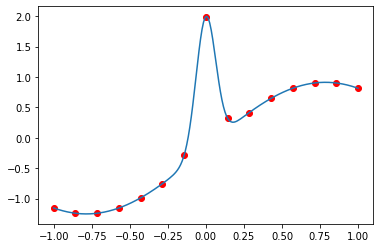

In [2]:
n=15
scaler = StandardScaler()
X=np.linspace(-1,1,n)[:,None]
f= lambda x: 2/3*np.sin(2*x)+4/3*np.exp(-30*(2*x)**2)-1/3  
Y=np.array([f(x) for x in X]).reshape(-1,1)
Y=scaler.fit_transform(Y)
Xt=np.linspace(-1,1,200)[:,None]
Yt=np.array([f(x) for x in Xt]).reshape(-1,1)
Yt=scaler.transform(Yt)
plt.plot(Xt,Yt)
plt.scatter(X,Y,color='r')

In [11]:
ker1=kernel(length=np.array([1]),scale=1,nugget=1e-6,name='sexp')
ker2=kernel(length=np.array([1]),scale=1,nugget=1e-6,name='sexp')
ker3=kernel(length=np.array([1]),scale=1,nugget=1e-6,name='sexp')
ker4=kernel(length=np.array([1]),scale=1,nugget=1e-6,name='sexp',scale_est=1)
ker_all=combine(ker1,ker2,ker3,ker4)
m=dgp(X,Y,ker_all)

In [12]:
m.train(N=1000,sub_burn=10,method='L-BFGS-B')

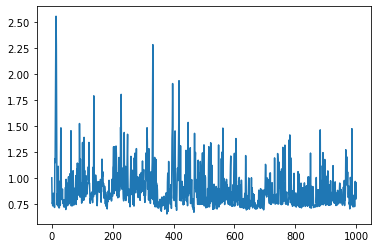

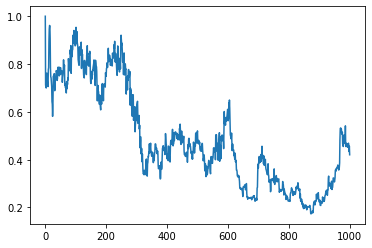

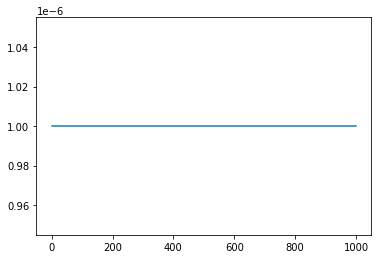

In [13]:
m.plot(3)

In [14]:
m.update_final_kernel(750)

In [15]:
z=np.linspace(-1,1,100)[:,None].reshape(-1,1)
mu,var=m.predict(z, N=300, burnin=0, method='mean_var')

se = 0.003285438120458203


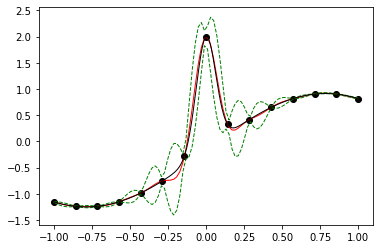

In [16]:
s=np.sqrt(var)
u=mu+2*s
l=mu-2*s
p=plt.plot(z,mu,color='r',alpha=1,lw=1)
p1=plt.plot(z,u,'--',color='g',lw=1)
p1=plt.plot(z,l,'--',color='g',lw=1)
plt.plot(Xt,Yt,color='black',lw=1)
plt.scatter(X,Y,color='black')

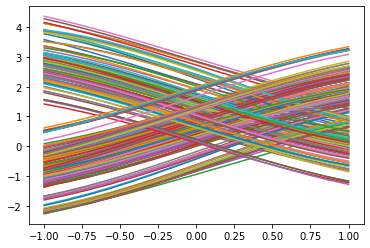

In [29]:
for i in range(len(m.samples[0])):
    plt.plot(m.samples[0][i],m.samples[1][i])

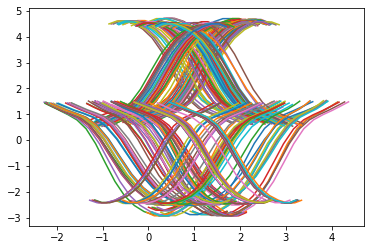

In [30]:
for i in range(len(m.samples[0])):
    plt.plot(m.samples[1][i],m.samples[2][i])

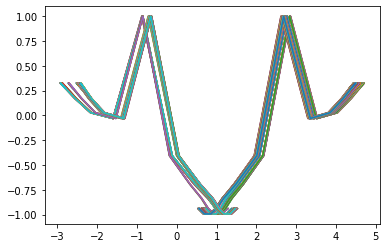

In [31]:
for i in range(len(m.samples[0])):
    plt.plot(m.samples[2][i],m.samples[3][i])